In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("customer_churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

it shows there is presence of null values in TotalCharges

To treat it

In [6]:
df["TotalCharges"]=df["MonthlyCharges"]*df["tenure"]

To vizualize null value Graphicaly

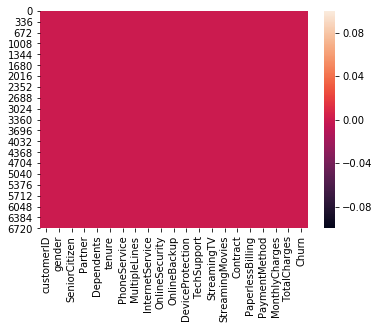

In [7]:
sns.heatmap(df.isnull())
plt.show()

customer id is unique for every customer then it will not requered for prediction

In [8]:
df.drop(columns="customerID",inplace=True)

In [9]:
col=df.columns
for i in col:
    print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

exept MonthlyCharges and TotalCharges every columns are catogerical data

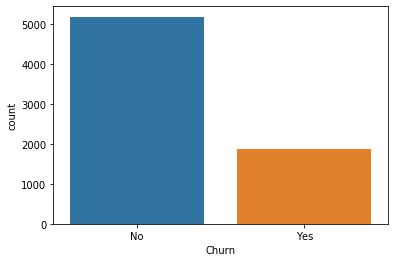

In [10]:
sns.countplot(df["Churn"])
plt.show()

it shows that existing customer who stay is higher than customer who leave 

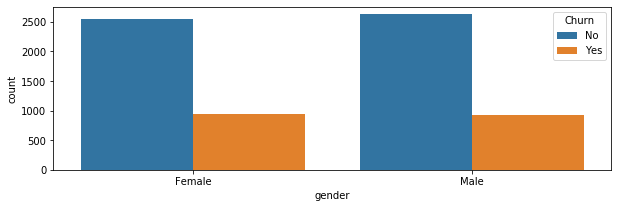

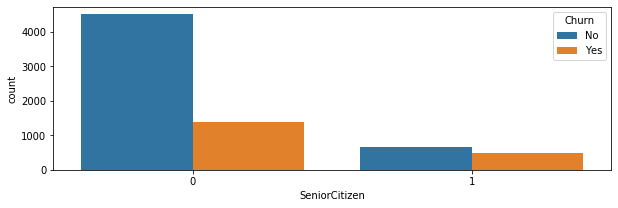

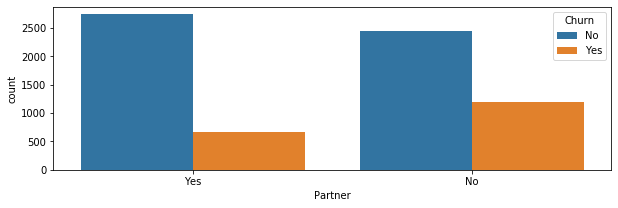

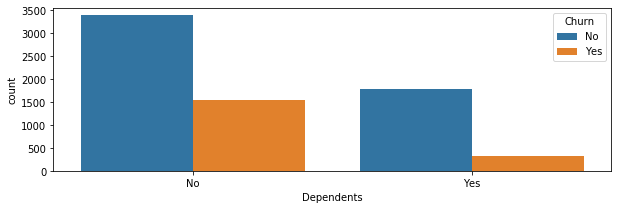

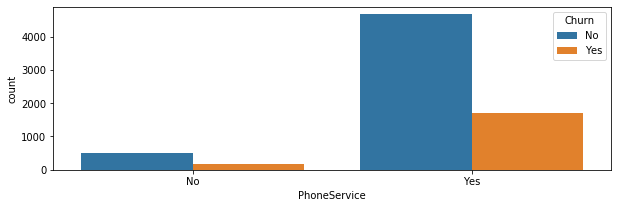

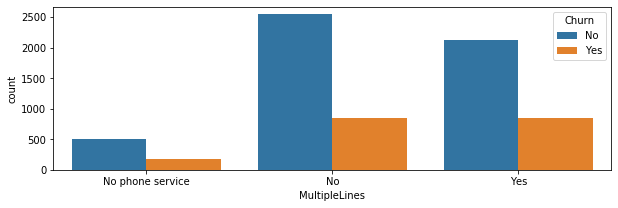

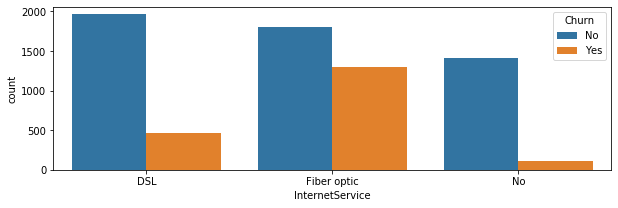

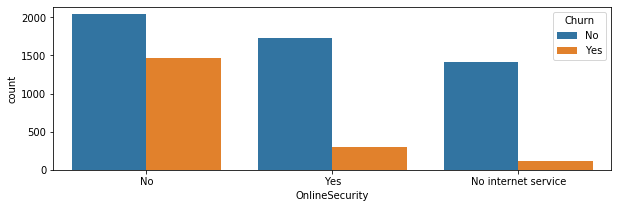

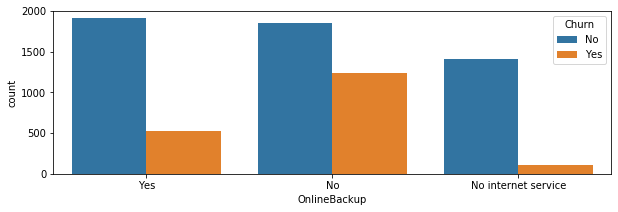

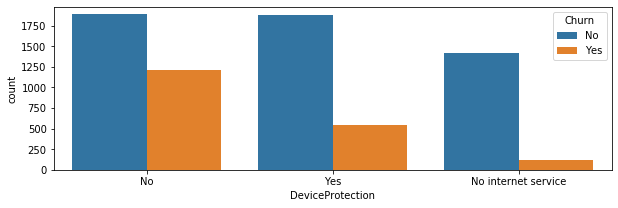

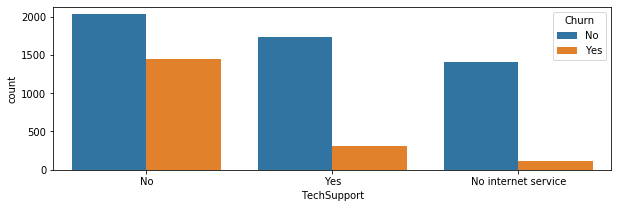

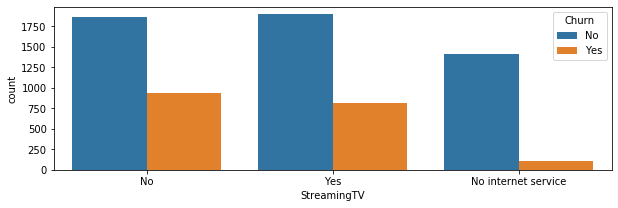

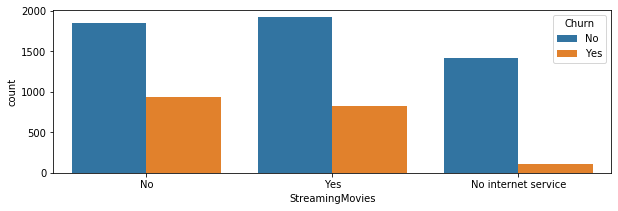

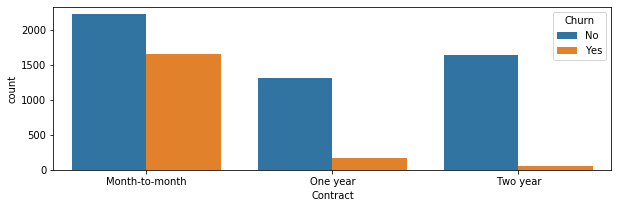

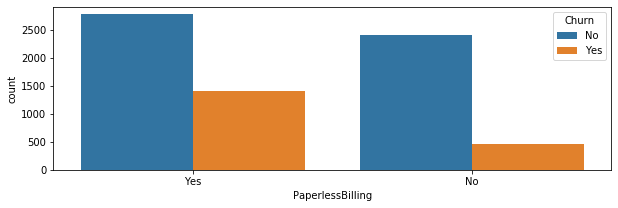

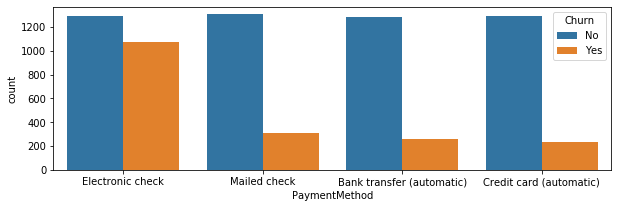

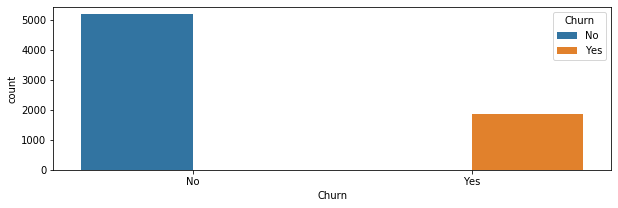

In [11]:
cat=df.drop(["tenure","MonthlyCharges","TotalCharges"],axis=1)
for i in cat.columns:
    plt.figure(figsize=(10,3))
    sns.countplot(df[i],hue=df["Churn"])
    plt.show()

the above graphs shows that what catagory of people are leave or stay in company

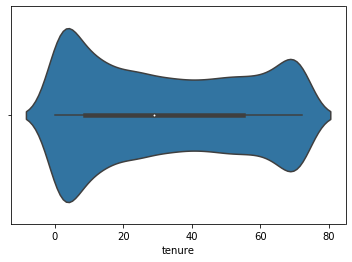

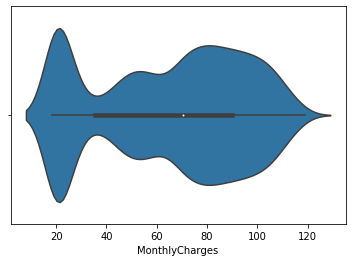

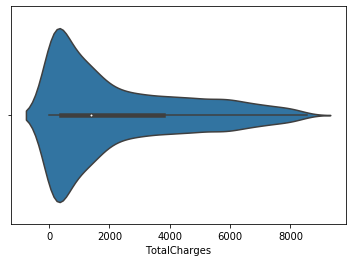

In [12]:
list1=["tenure","MonthlyCharges","TotalCharges"]
for i in list1:
    sns.violinplot(df[i])
    plt.show()

To convert object data into int data by label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
object1=df.select_dtypes("object")
for i in object1.columns:
    df[i]=le.fit_transform(df[i])

In [14]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

Now every variable is converted into int data it will be perfect for model

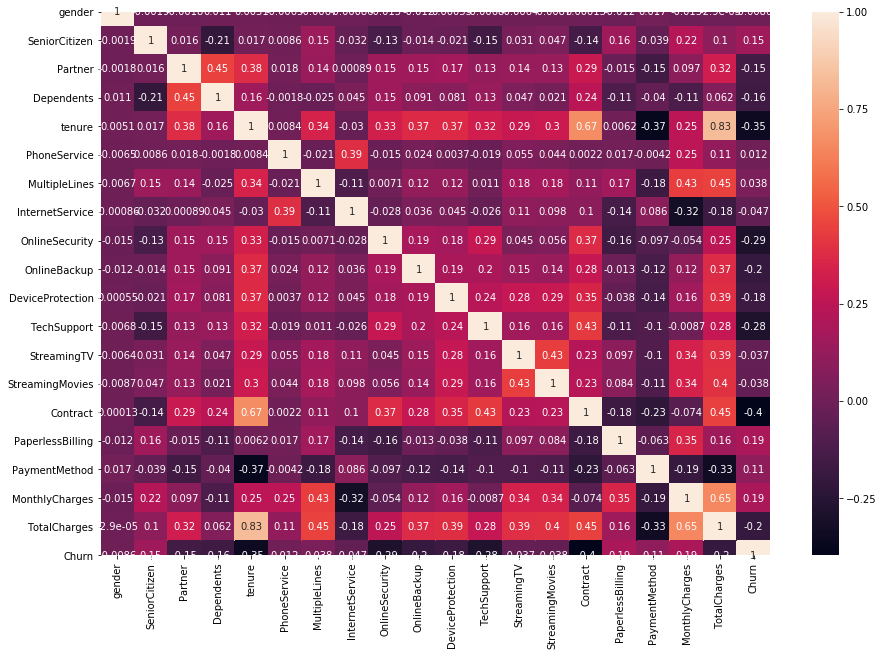

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198514
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()
df.corr()["Churn"].sort_values(ascending=False)

Contract and tenure have high negative correlation

In [33]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.344639
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.306229
Churn               1.063031
dtype: float64

In [32]:
list1=["SeniorCitizen","Dependents","Churn","Contract","TotalCharges"]
for i in list1:
    df[i]=np.sqrt(df[i])

split input and output data

In [34]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [35]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [36]:
def metrix(a,b):
    print("acc_score : ",accuracy_score(a,b))
    print("confusion_matrix : ",confusion_matrix(a,b))
    print("classification_report : ",classification_report(a,b))

In [37]:
def model(mod,x1,y1,x2,y2):
    mod.fit(x1,y1)
    pred=mod.predict(x2)
    metrix(y2,pred)

split data as train and test

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=.20)

In [39]:
model1=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [40]:
for i in model1:
    print("Cross_val_score : ",cross_val_score(i,x,y,cv=5).mean())
    model(i,xtrain,ytrain,xtest,ytest)

Cross_val_score :  0.8054813633343976
acc_score :  0.8168914123491838
confusion_matrix :  [[941  95]
 [163 210]]
classification_report :                precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1036
         1.0       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Cross_val_score :  0.7576318952737076
acc_score :  0.7643718949609652
confusion_matrix :  [[789 247]
 [ 85 288]]
classification_report :                precision    recall  f1-score   support

         0.0       0.90      0.76      0.83      1036
         1.0       0.54      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409

Cross_val_score :  0.7237028887802699
acc_score :  0.7239176721078779


LogisticRegression,AdaBoostClassifier,GradientBoostingClassifier are haveing good accuracy score than other model 

In [41]:
def gscv(mod,para,x1,y1,x2,y2):
    gv=GridSearchCV(mod,para,cv=5)
    gv.fit(x1,y1)
    pred=gv.predict(x2)
    print(accuracy_score(y2,pred))

In [42]:
ada={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,.1,0.15,.2]}

In [43]:
gscv(AdaBoostClassifier(),ada,xtrain,ytrain,xtest,ytest)

0.8112136266855926


accuracy is increased by 1% by grid search